In [68]:
#install.packages('caTools')

also installing the dependency 'bitops'



package 'bitops' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\amara\AppData\Local\Temp\RtmpeQeqlz\downloaded_packages


In [1]:
library(MASS)
library(leaps)
library(glmnet)

library(ISLR)


library(caTools)

Warning message:
"package 'MASS' was built under R version 3.6.3"Warning message:
"package 'leaps' was built under R version 3.6.3"Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"Loaded glmnet 4.1-1
Warning message:
"package 'caTools' was built under R version 3.6.3"

## Could not get the data from the site so I have sorced it from kaagle

In [2]:
data = read.csv(file="C:/Users/amara/OneDrive/Desktop/SDM1/assignment2/caravan-insurance-challenge.csv")

In [3]:
head(data)

ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
train,23,1,2,1,5,0,5,0,5,...,0,0,0,0,0,0,0,0,0,0


## Have to split the train and test data

In [4]:
train_data =data[which(data[,1] == 'train'),]
test_data =data[which(data[,1] == 'test'),]

In [5]:
train_data = subset (train_data, select = -1)
test_data = subset (test_data, select = -1)

## Checking if the data is of the right dimensions

In [6]:
dim(train_data)
dim(test_data)

[1] 5822   86

[1] 4000   86

In [7]:
head(test_data)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
5823,33,1,4,2,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,0
5824,6,1,3,2,2,0,5,0,4,5,...,0,0,0,1,0,0,0,0,0,1
5825,39,1,3,3,9,1,4,2,3,5,...,0,0,0,1,0,0,0,0,0,0
5826,9,1,2,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
5827,31,1,2,4,7,0,2,0,7,9,...,0,0,0,1,0,0,0,0,0,0
5828,30,1,2,4,7,1,4,2,3,5,...,0,0,0,2,0,0,0,0,0,0


## caravn is the target variable

Implimenting simple linear model

In [8]:
linear_model = lm(CARAVAN~.,data = train_data)
y_hat = predict(linear_model ,test_data)
error = mean((test_data[,"CARAVAN"] - y_hat)^2)
error

[1] 0.053985

## we get MSE of 5.3 %

In [9]:
#regfit.full = regsubsets(CARAVAN~., data= train_data, nbest=1 , nvmax = 85, method ="exhaustive")

In [10]:
regfit.fwd = regsubsets(CARAVAN~., data= train_data, nbest=1 , nvmax = 85, method ="forward")

In [11]:
my_sum_fwd = summary(regfit.fwd)

In [12]:
names(my_sum_fwd)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [13]:
coef(regfit.fwd, 10)

(Intercept)       MRELGE     MOPLLAAG     MBERBOER     MKOOPKLA      PWAPART 
-0.019845474  0.005933600 -0.005914735 -0.008419351  0.004227842  0.011079245 
    PPERSAUT       PBRAND     APLEZIER       AFIETS     ABYSTAND 
 0.010545098  0.006845541  0.285530029  0.039278555  0.078294696

In [14]:
regfit.bwd <- regsubsets(CARAVAN~., data= train_data, nbest=1, nvmax = 85, method ="backward")

In [15]:
my_sum_bwd = summary(regfit.bwd)

In [16]:
names(my_sum_bwd)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [17]:
coef(regfit.bwd, 10)

(Intercept)        MRELGE      MOPLLAAG      MBERBOER       PWALAND 
-9.266593e-05  6.781188e-03 -7.379527e-03 -8.546117e-03 -1.960119e-02 
     PPERSAUT        PBRAND        ALEVEN      APLEZIER        AFIETS 
 1.108606e-02  1.089528e-02  7.334644e-03  2.849877e-01  4.044235e-02 
     ABYSTAND 
 8.003541e-02

In [18]:
par(mfrow = c(2,2))

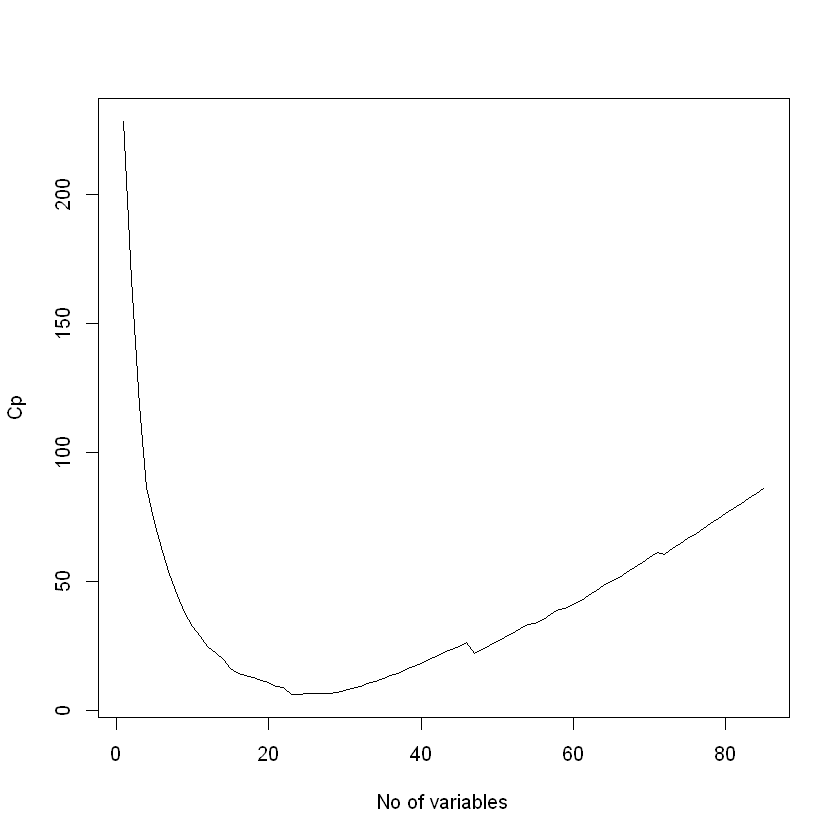

In [19]:
plot(my_sum_fwd$cp , xlab = 'No of variables' , ylab = 'Cp',type = 'l')

## Around 22 variables is best

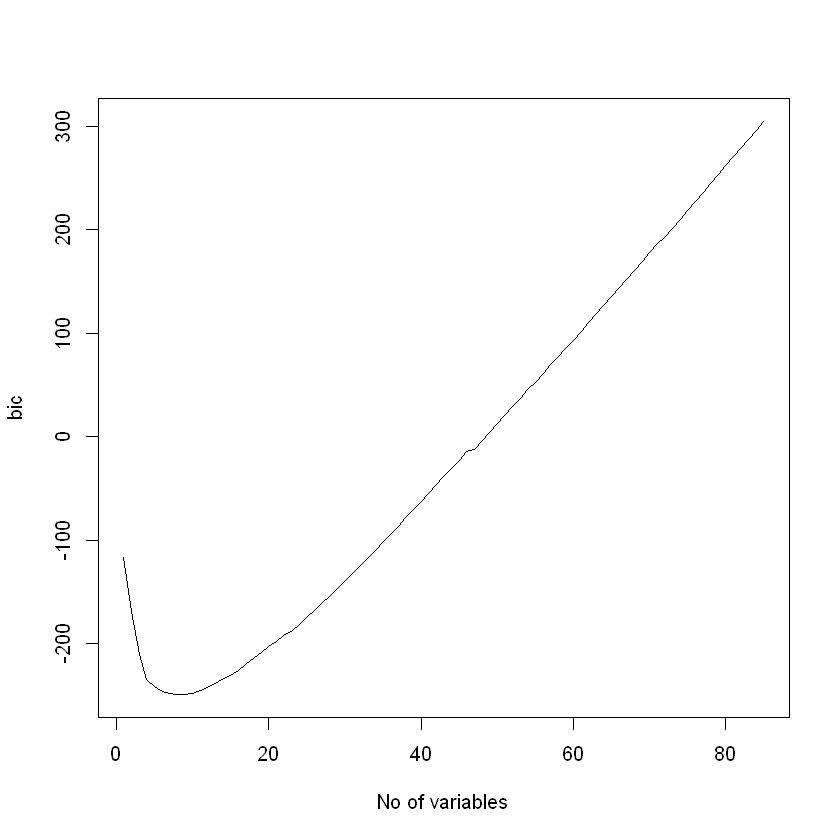

In [20]:
plot(my_sum_fwd$bic , xlab = 'No of variables' , ylab = 'bic',type = 'l')

## Around 10 Variables is best 

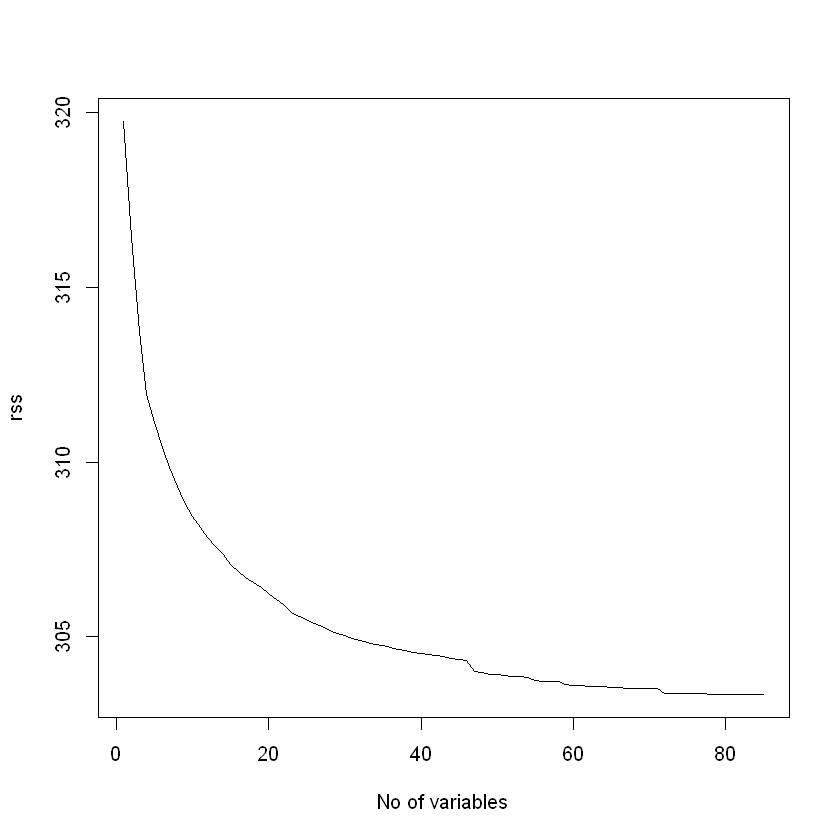

In [21]:
plot(my_sum_fwd$rss , xlab = 'No of variables' , ylab = 'rss',type = 'l')

## Best Around 80

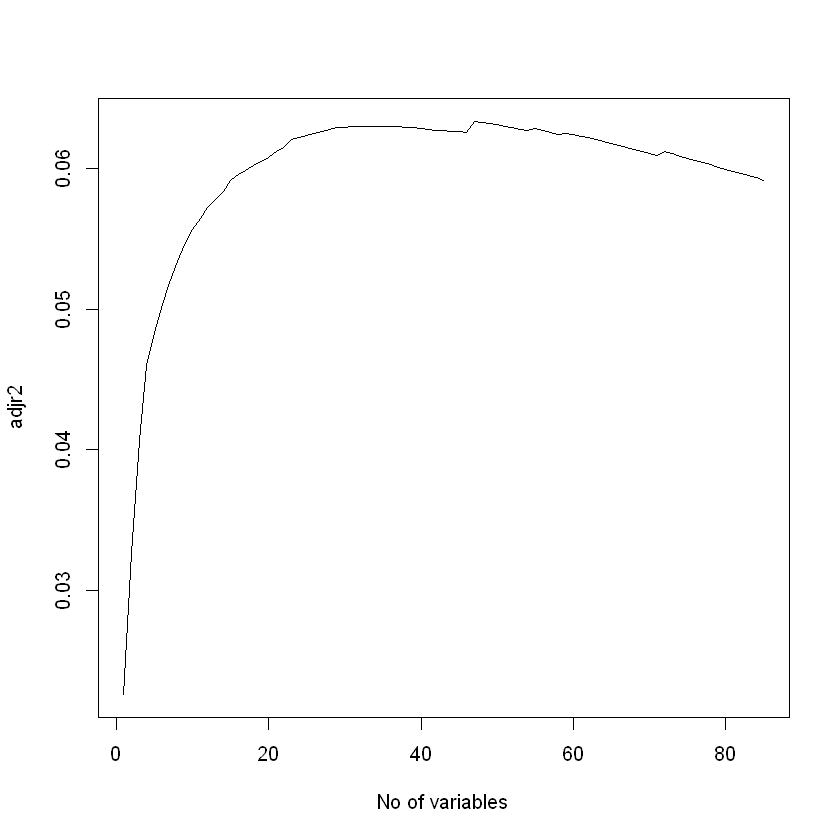

In [22]:
plot(my_sum_fwd$adjr2 , xlab = 'No of variables' , ylab = 'adjr2',type = 'l')

## Best around 50

## optimal model selection 

In [23]:
which(my_sum_fwd$cp == min(my_sum_fwd$cp))

[1] 23

In [24]:
which(my_sum_fwd$bic == min(my_sum_fwd$bic))

[1] 8

In [25]:
which(my_sum_fwd$rss == min(my_sum_fwd$rss))

[1] 85

In [26]:
which(my_sum_fwd$adjr2 == max(my_sum_fwd$adjr2))

[1] 47

Forward and backward selection

In [27]:
regfit.fwd = regsubsets(CARAVAN~., data= train_data, nbest=1 , nvmax = 85, method ="forward")

In [28]:
regfit.bwd <- regsubsets(CARAVAN~., data= train_data, nbest=1, nvmax = 85, method ="backward")

In [29]:
my_sum_fwd$outmat

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
1 ( 1 ),,,,,,,,,,,...,,,,,,,,,,
2 ( 1 ),,,,,,,,,,,...,,,,,,,*,,,
3 ( 1 ),,,,,,,,,,,...,,,,,,,*,,,
4 ( 1 ),,,,,,,,,,,...,,,,,,,*,,,
5 ( 1 ),,,,,,,,,,,...,,,,,,,*,,,
6 ( 1 ),,,,,,,,,,*,...,,,,,,,*,,,
7 ( 1 ),,,,,,,,,,*,...,,,,,,,*,,,
8 ( 1 ),,,,,,,,,,*,...,,,,,,,*,,,*
9 ( 1 ),,,,,,,,,,*,...,,,,,,,*,,,*
10 ( 1 ),,,,,,,,,,*,...,,,,,,,*,*,,*


In [30]:
my_sum_bwd$outmat

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
1 ( 1 ),,,,,,,,,,,...,,,,,,,,,,
2 ( 1 ),,,,,,,,,,,...,,,,,,,*,,,
3 ( 1 ),,,,,,,,,,,...,,,,,,,*,,,
4 ( 1 ),,,,,,,,,,,...,,,,,,,*,,,
5 ( 1 ),,,,,,,,,,*,...,,,,,,,*,,,
6 ( 1 ),,,,,,,,,,*,...,,,,,,,*,,,
7 ( 1 ),,,,,,,,,,*,...,,,,,,,*,,,*
8 ( 1 ),,,,,,,,,,*,...,,,,,,,*,,,*
9 ( 1 ),,,,,,,,,,*,...,,,,,,,*,*,,*
10 ( 1 ),,,,,,,,,,*,...,*,,,,,,*,*,,*


In [31]:
coef(regfit.fwd,85)

(Intercept)       MOSTYPE      MAANTHUI       MGEMOMV      MGEMLEEF 
 0.7685381210  0.0035209062 -0.0072642419 -0.0012739468  0.0107473471 
     MOSHOOFD        MGODRK        MGODPR        MGODOV        MGODGE 
-0.0154869494 -0.0056016278 -0.0002068921  0.0003569192 -0.0030236861 
       MRELGE        MRELSA        MRELOV      MFALLEEN      MFGEKIND 
 0.0086829485  0.0020366662  0.0055682397 -0.0038249974 -0.0050625348 
     MFWEKIND      MOPLHOOG      MOPLMIDD      MOPLLAAG      MBERHOOG 
-0.0026253007  0.0021357309 -0.0048455916 -0.0113976541  0.0021883996 
     MBERZELF      MBERBOER      MBERMIDD      MBERARBG      MBERARBO 
-0.0004664921 -0.0050974329  0.0041254310 -0.0006059790  0.0019733379 
         MSKA         MSKB1         MSKB2          MSKC          MSKD 
-0.0013674243 -0.0031701270 -0.0012603246  0.0024878517 -0.0008866406 
       MHHUUR        MHKOOP         MAUT1         MAUT2         MAUT0 
-0.0454201289 -0.0432242340  0.0085963526  0.0077871183  0.0047215265 
      MZFONDS        MZPART       MINKM30      MINK3045      MINK4575 
-0.0561024245 -0.0593733297  0.0070879452  0.0069414349  0.0049678945 
     MINK7512      MINK123M       MINKGEM      MKOOPKLA       PWAPART 
 0.0059267325 -0.0098939379  0.0063043896  0.0029097074  0.0284931369 
      PWABEDR       PWALAND      PPERSAUT       PBESAUT       PMOTSCO 
-0.0101532984 -0.0201220388  0.0102786756  0.0014405097 -0.0061279335 
      PVRAAUT      PAANHANG      PTRACTOR        PWERKT         PBROM 
-0.0249190183  0.0588044302  0.0121480597 -0.0062440079  0.0078682769 
       PLEVEN      PPERSONG       PGEZONG       PWAOREG        PBRAND 
-0.0155397049  0.0098925979  0.1937253794  0.0647932612  0.0132643126 
      PZEILPL      PPLEZIER        PFIETS       PINBOED      PBYSTAND 
-0.1917507210 -0.0299075992 -0.0107777114 -0.0441619610 -0.0184858082 
      AWAPART       AWABEDR       AWALAND      APERSAUT       ABESAUT 
-0.0377951815  0.0185448468  0.0180904046  0.0002821215 -0.0214815931 
      AMOTSCO       AVRAAUT      AAANHANG      ATRACTOR        AWERKT 
 0.0203251539  0.0563674560 -0.0804238438 -0.0395650589 -0.0010525883 
        ABROM        ALEVEN      APERSONG       AGEZONG       AWAOREG 
-0.0236461657  0.0372344402 -0.0464278875 -0.4050641564 -0.2304560541 
       ABRAND       AZEILPL      APLEZIER        AFIETS       AINBOED 
-0.0211373806  0.4958050850  0.3633886975  0.0416060625  0.0959436471 
     ABYSTAND 
 0.1312250049

In [32]:
coef(regfit.bwd,85)

(Intercept)       MOSTYPE      MAANTHUI       MGEMOMV      MGEMLEEF 
 0.7685381210  0.0035209062 -0.0072642419 -0.0012739468  0.0107473471 
     MOSHOOFD        MGODRK        MGODPR        MGODOV        MGODGE 
-0.0154869494 -0.0056016278 -0.0002068921  0.0003569192 -0.0030236861 
       MRELGE        MRELSA        MRELOV      MFALLEEN      MFGEKIND 
 0.0086829485  0.0020366662  0.0055682397 -0.0038249974 -0.0050625348 
     MFWEKIND      MOPLHOOG      MOPLMIDD      MOPLLAAG      MBERHOOG 
-0.0026253007  0.0021357309 -0.0048455916 -0.0113976541  0.0021883996 
     MBERZELF      MBERBOER      MBERMIDD      MBERARBG      MBERARBO 
-0.0004664921 -0.0050974329  0.0041254310 -0.0006059790  0.0019733379 
         MSKA         MSKB1         MSKB2          MSKC          MSKD 
-0.0013674243 -0.0031701270 -0.0012603246  0.0024878517 -0.0008866406 
       MHHUUR        MHKOOP         MAUT1         MAUT2         MAUT0 
-0.0454201289 -0.0432242340  0.0085963526  0.0077871183  0.0047215265 
      MZFONDS        MZPART       MINKM30      MINK3045      MINK4575 
-0.0561024245 -0.0593733297  0.0070879452  0.0069414349  0.0049678945 
     MINK7512      MINK123M       MINKGEM      MKOOPKLA       PWAPART 
 0.0059267325 -0.0098939379  0.0063043896  0.0029097074  0.0284931369 
      PWABEDR       PWALAND      PPERSAUT       PBESAUT       PMOTSCO 
-0.0101532984 -0.0201220388  0.0102786756  0.0014405097 -0.0061279335 
      PVRAAUT      PAANHANG      PTRACTOR        PWERKT         PBROM 
-0.0249190183  0.0588044302  0.0121480597 -0.0062440079  0.0078682769 
       PLEVEN      PPERSONG       PGEZONG       PWAOREG        PBRAND 
-0.0155397049  0.0098925979  0.1937253794  0.0647932612  0.0132643126 
      PZEILPL      PPLEZIER        PFIETS       PINBOED      PBYSTAND 
-0.1917507210 -0.0299075992 -0.0107777114 -0.0441619610 -0.0184858082 
      AWAPART       AWABEDR       AWALAND      APERSAUT       ABESAUT 
-0.0377951815  0.0185448468  0.0180904046  0.0002821215 -0.0214815931 
      AMOTSCO       AVRAAUT      AAANHANG      ATRACTOR        AWERKT 
 0.0203251539  0.0563674560 -0.0804238438 -0.0395650589 -0.0010525883 
        ABROM        ALEVEN      APERSONG       AGEZONG       AWAOREG 
-0.0236461657  0.0372344402 -0.0464278875 -0.4050641564 -0.2304560541 
       ABRAND       AZEILPL      APLEZIER        AFIETS       AINBOED 
-0.0211373806  0.4958050850  0.3633886975  0.0416060625  0.0959436471 
     ABYSTAND 
 0.1312250049

### The below code segment is from the lab and statistical text book

In [33]:
predict.regsubsets=function(object,newdata, id){
  form = as.formula(object$call[[2]])
  mat = model.matrix(form, newdata)
  coefi = coef(object, id=id)
  xvars=names(coefi)
  mat[,xvars]%*%coefi
}

In [34]:
train_err_store = matrix(rep(NA, 85))
test_err_store = matrix(rep(NA, 85))

In [35]:
train_pred = model.matrix(CARAVAN~., data= train_data)
test_pred = model.matrix(CARAVAN~., data = test_data)
#Y_train = 
#Y_test

In [36]:
for (i in 1:85) {
  coefi = coef(regfit.fwd, id = i)
  pred_train <- train_pred[,names(coefi)] %*% coefi
  train_err_store[i] = mean((train_data$CARAVAN - pred_train)^2)
  pred_test <- test_pred[,names(coefi)] %*% coefi
  test_err_store[i] = mean((test_data$CARAVAN - pred_test)^2)
}



In [37]:
min(test_err_store)

[1] 0.05385551

## MSE for fwd is 5.3 percent

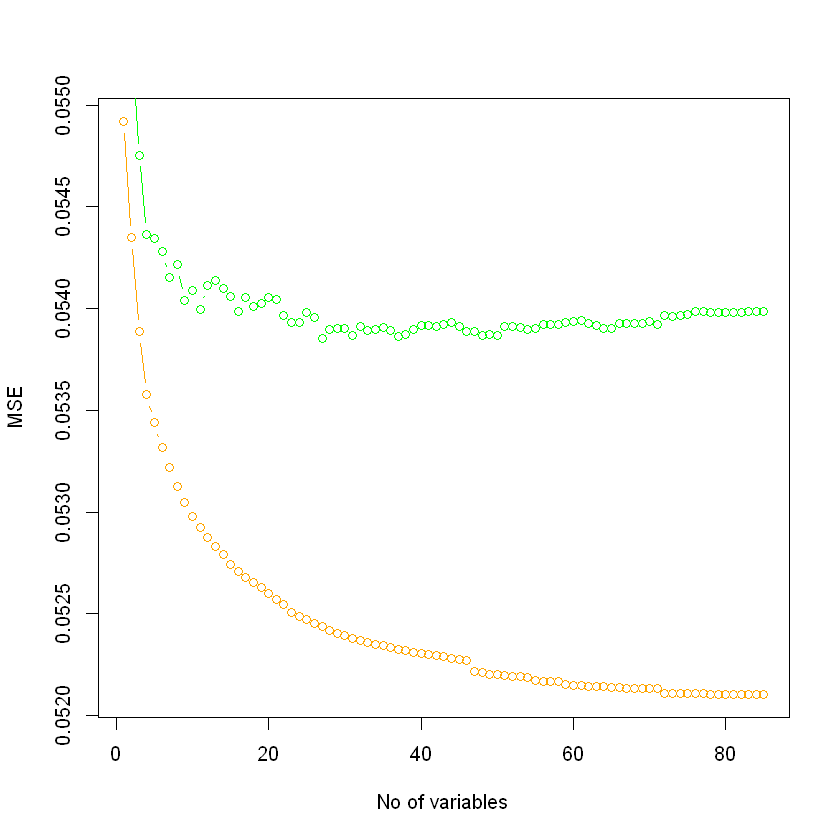

In [38]:
plot(train_err_store, col = 'orange', type = "b", xlab="No of variables", ylab = "MSE")
lines(test_err_store, col = "green", type = "b")

In [39]:
for (i in 1:85) {
  coefi = coef(regfit.bwd, id = i)
  pred_train <- train_pred[,names(coefi)] %*% coefi
  train_err_store[i] = mean((train_data$CARAVAN - pred_train)^2)
  pred_test <- test_pred[,names(coefi)] %*% coefi
  test_err_store[i] = mean((test_data$CARAVAN - pred_test)^2)
}

In [40]:
min(test_err_store)

[1] 0.05383966

In [41]:
## MSE for bwd is 5.4 percent

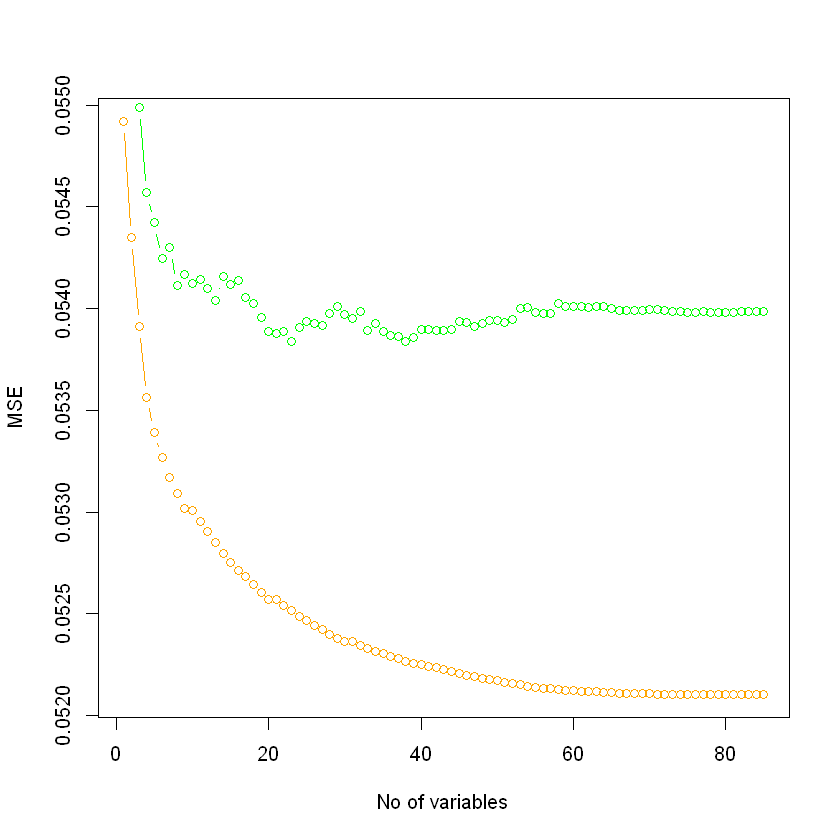

In [42]:
plot(train_err_store, col = 'orange', type = "b", xlab="No of variables", ylab = "MSE")
lines(test_err_store, col = "green", type = "b")

## Creating ridge regression model 

In [43]:
test_mod = model.matrix(CARAVAN ~ . -1, data = test_data)
train_mod =  model.matrix(CARAVAN ~ . -1 , data = train_data)
ridge_model =  cv.glmnet(train_mod, train_data[, "CARAVAN"], alpha = 0)

In [44]:
lamda_best = ridge_model$lambda.min
lamda_best

[1] 0.08459105

In [45]:
ridge_model_pred = predict(ridge_model, s=lamda_best, newx= test_mod)
mean((test_data[, "CARAVAN"] - ridge_model_pred)^2)

[1] 0.05369691

## MSE Ridge 5.3%

## Creating lasso model

In [46]:
test_mod = model.matrix(CARAVAN ~ . -1, data = test_data)
train_mod =  model.matrix(CARAVAN ~ . -1 , data = train_data)
lasso_model =  cv.glmnet(train_mod, train_data[, "CARAVAN"], alpha = 1)

In [47]:
lamda_best = lasso_model$lambda.min
lamda_best

[1] 0.003184799

In [48]:
lasso_model_pred = predict(lasso_model, s=lamda_best, newx= test_mod)
mean((test_data[, "CARAVAN"] - lasso_model_pred)^2)

[1] 0.05376028

## MSE Lasso 5.3%

### In our case for this problem all the methods performed about the same with an MSE of about 5.3%